In [15]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [32]:
#2. Read the .csv file

data = pd.read_csv("/Users/elnazshahzeidi/Downloads/marketing_customer_analysis.csv")
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [33]:
# 3.1 : Change headers names.

data.columns = data.columns.str.lower().str.replace(' ','_')
data.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [34]:
# 3.2: Data cleaning/checking and adjusting the types of data in each column

data.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [35]:
# 3.3: dealing with the Nans.

data.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [36]:
# 3.4: Categorical and Numerical Features


numerical = data.select_dtypes('number')

numerical.dtypes

unnamed:_0                         int64
customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [37]:
categorical= data.select_dtypes('object')

categorical.dtypes

customer             object
state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
vehicle_type         object
dtype: object

In [38]:
data['state'].value_counts()


state
California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: count, dtype: int64

In [39]:
data['response'].value_counts()

response
No     8813
Yes    1466
Name: count, dtype: int64

In [40]:
data['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    5212
Two-Door Car     2118
SUV              2012
Sports Car        550
Luxury SUV        208
Luxury Car        188
Name: count, dtype: int64

In [41]:
data1 = data.copy()

data1 = data1.fillna({
    col : data1[col].dropna().median if col in numerical else 'others' for col in data1.columns})

data1.isna().sum()

unnamed:_0                       0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

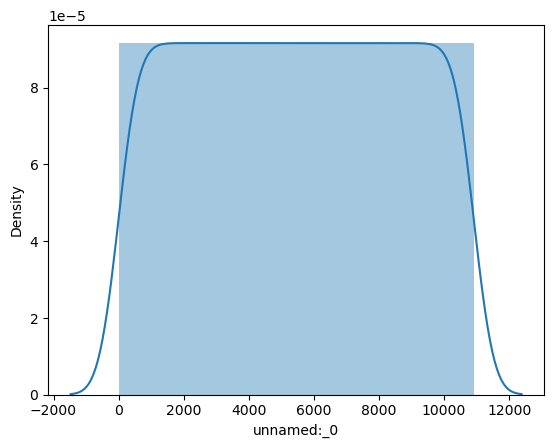

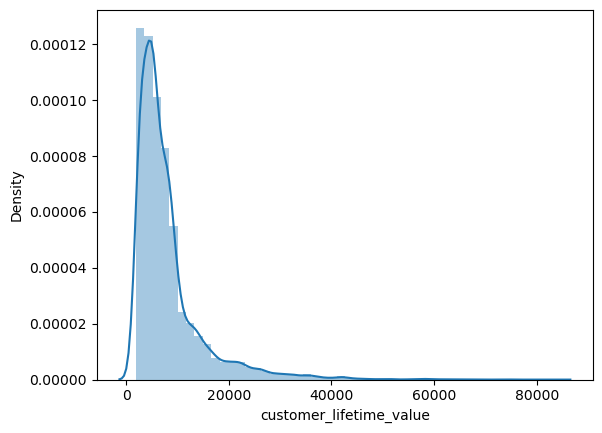

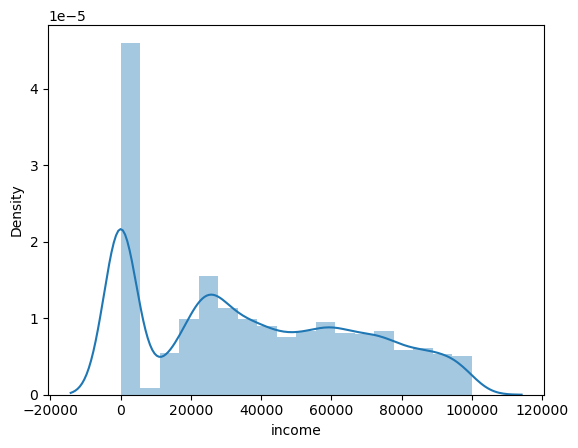

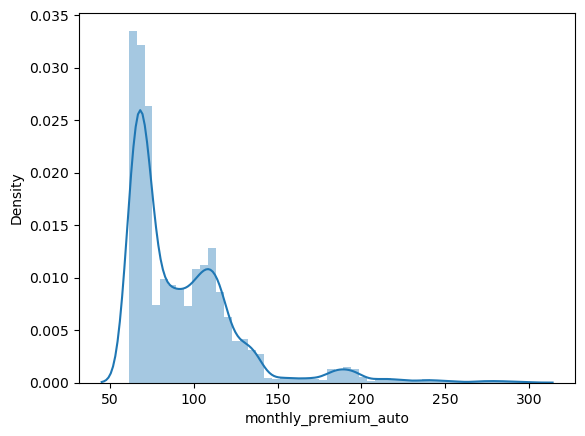

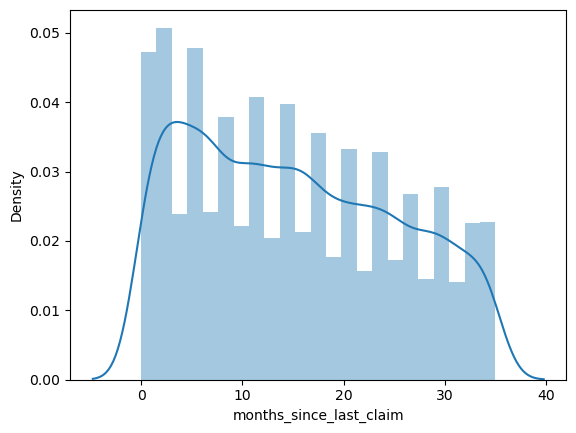

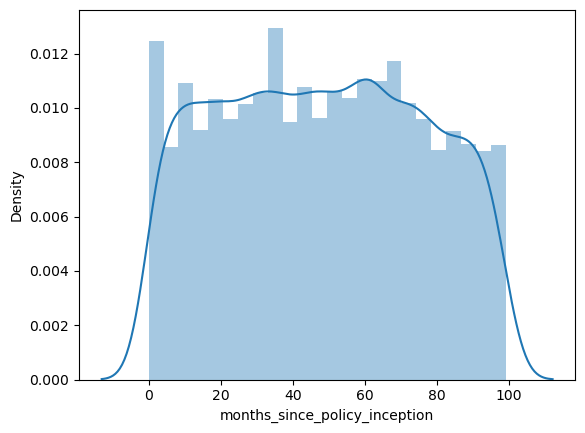

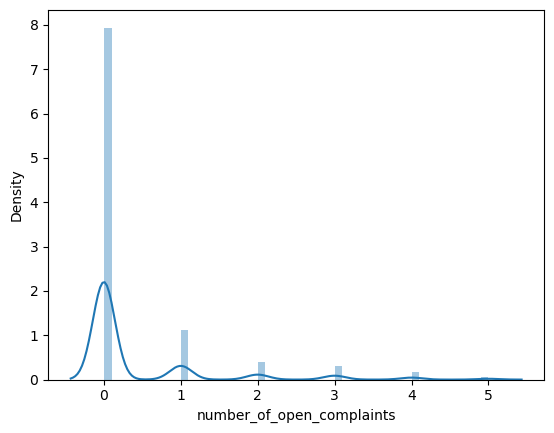

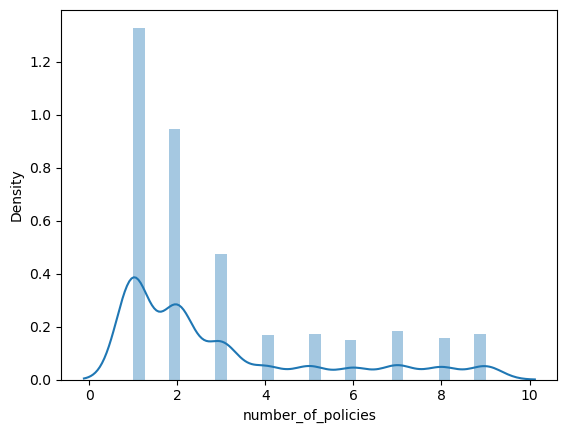

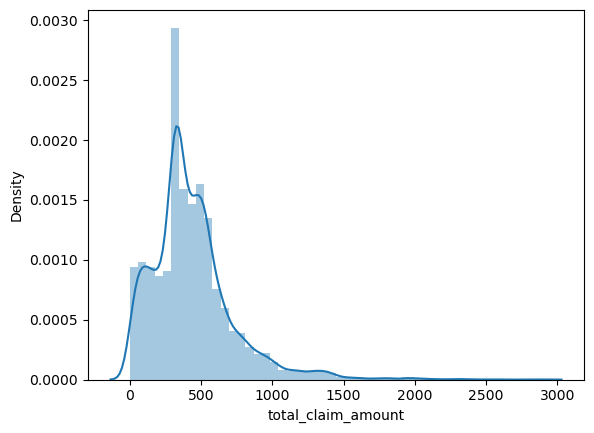

In [42]:
# 3.5: Exploration / Probability Distributions

data2 = data1.copy()

for col in numerical.columns:
    sns.distplot(numerical[col])
    plt.show()

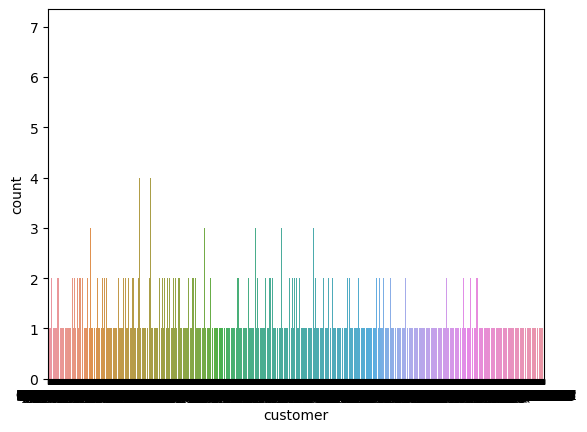

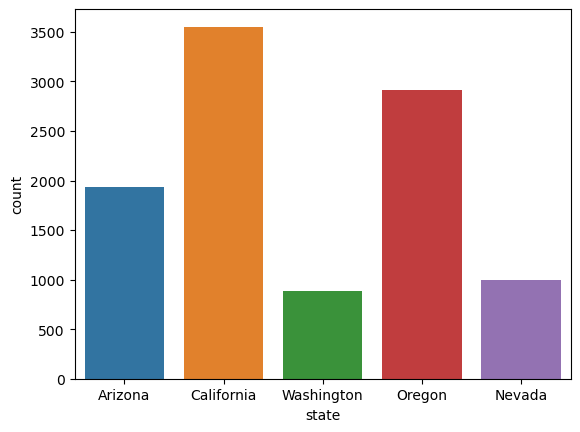

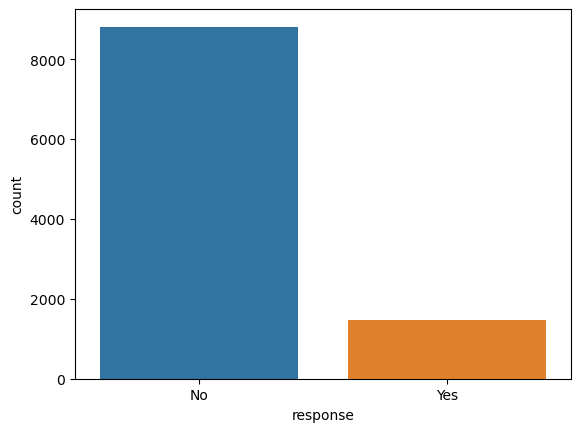

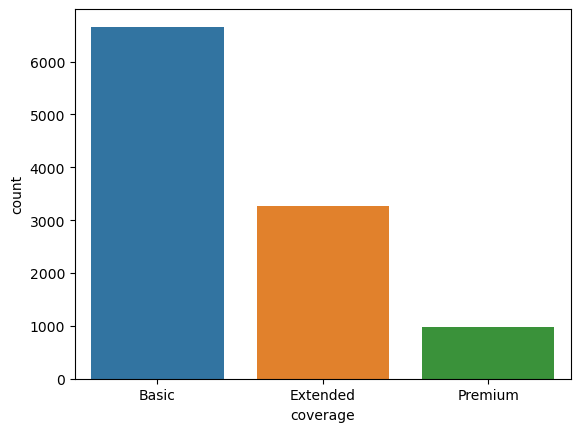

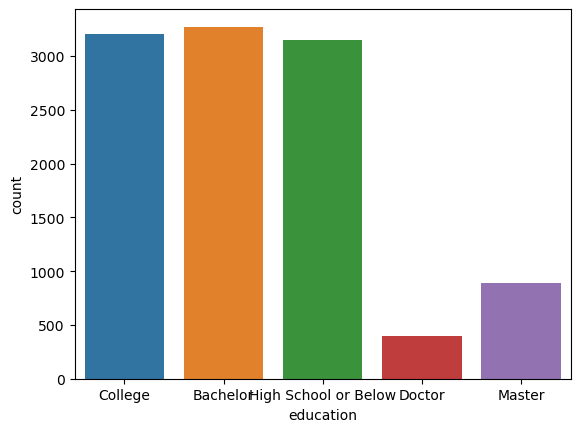

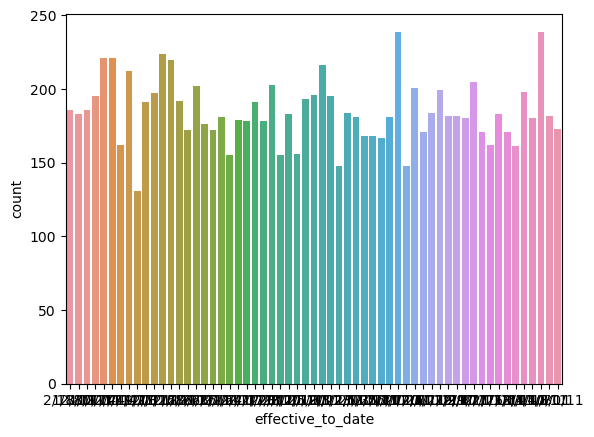

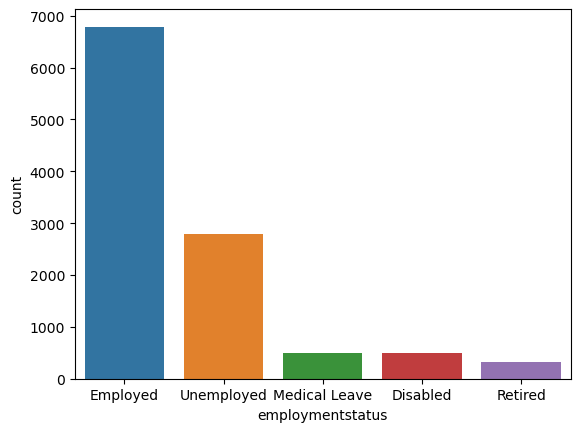

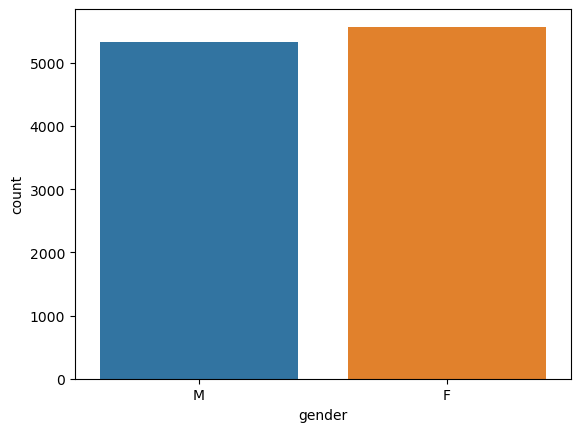

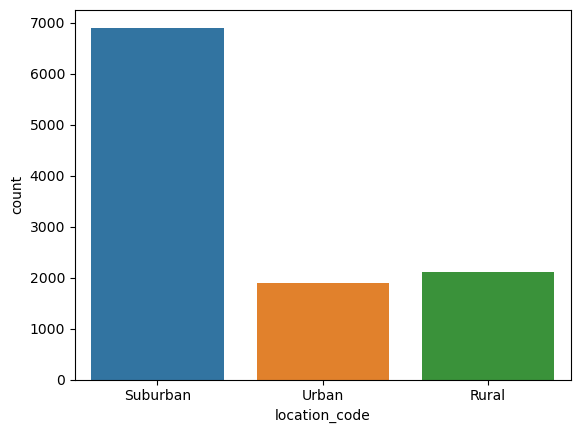

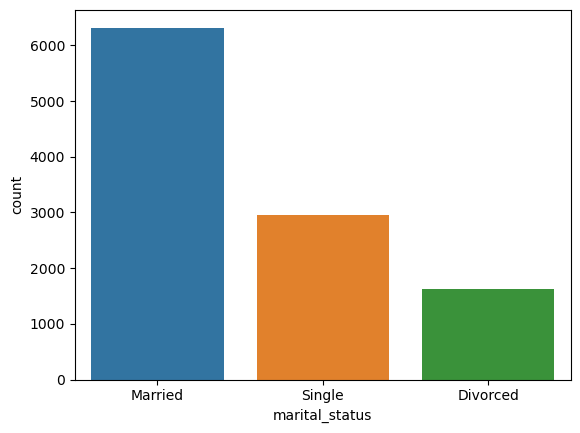

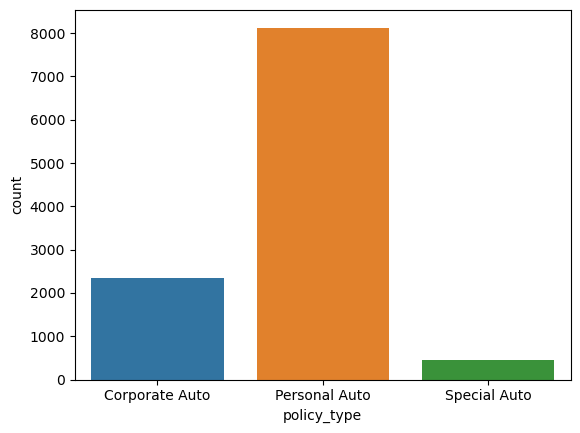

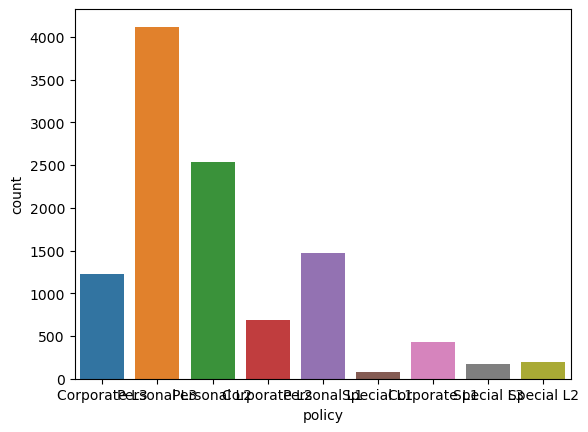

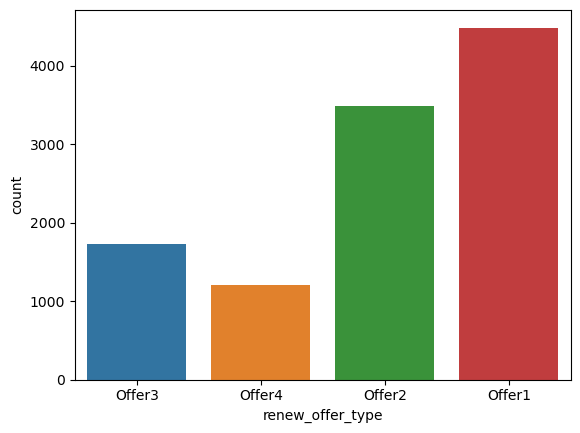

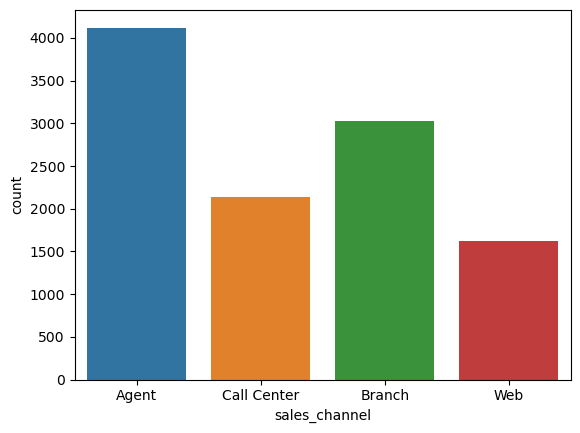

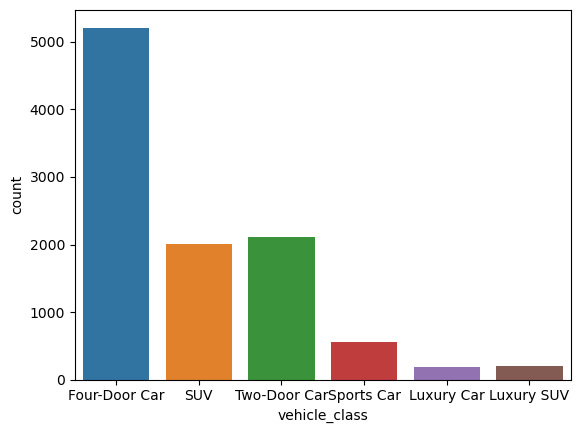

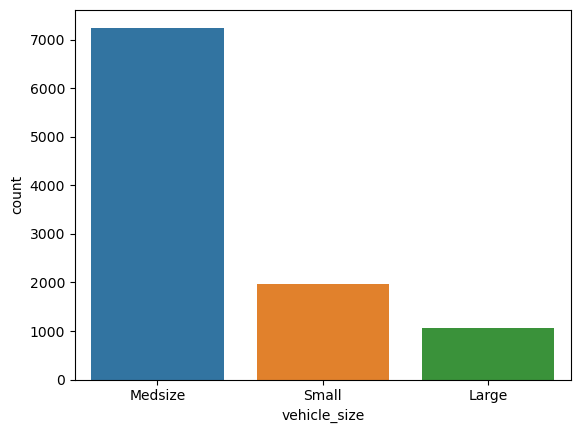

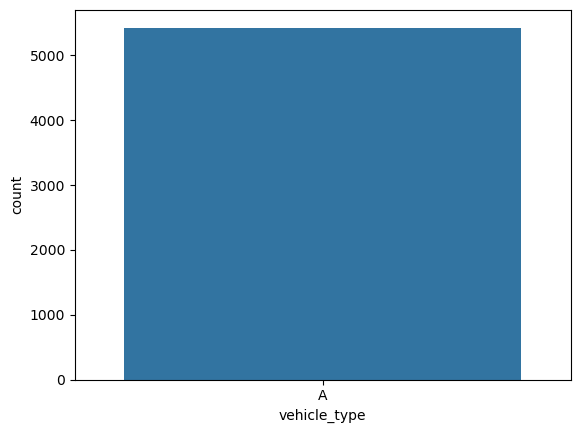

In [44]:
for col in categorical.columns:
    sns.countplot(x= categorical[col])
    plt.show()

In [ ]:
# Dealing with outliers.

data2.describe().T

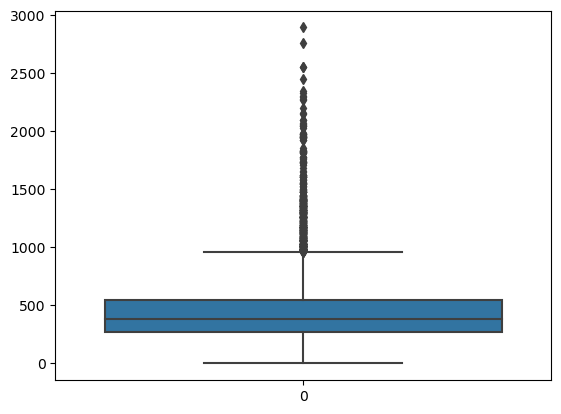

In [45]:
data3 = data2.copy()

sns.boxplot(data3['total_claim_amount'])
plt.show()    

In [46]:
IQR = abs(np.quantile(data3["total_claim_amount"], .25) - np.quantile(data3["total_claim_amount"], .75)) * 1.5
lower_boundary = np.quantile(data3["total_claim_amount"], .25) - IQR
upper_boundary = np.quantile(data3["total_claim_amount"], .75) + IQR


#lower_boundary = round(lower_boundary, 2)
#upper_boundary = round(upper_boundary, 2)

lower_boundary, upper_boundary

(-143.09368312500004, 961.3762098750001)

In [47]:
data3[(data3["total_claim_amount"] > 961.3762098750001) | (data3["total_claim_amount"] < -143.09368312500004)].sort_values("total_claim_amount")



,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
10786,10786,WX19595,Arizona,14429.892840,No,Basic,High School or Below,1/1/11,Unemployed,M,...,0.0,9,Personal Auto,Personal L2,Offer4,Agent,962.159318,Luxury Car,Small,others
10755,10755,WX19595,Arizona,14429.892840,No,Basic,High School or Below,1/1/11,Unemployed,M,...,<bound method NDFrame._add_numeric_operations....,9,Personal Auto,Personal L2,Offer4,Agent,962.159318,Luxury Car,Small,A
10159,10159,OD70577,Arizona,2840.899849,No,Extended,College,2/28/11,Unemployed,F,...,1.0,1,Personal Auto,Personal L3,Offer1,Branch,962.526106,Two-Door Car,Medsize,others
313,313,CV44550,Arizona,7559.206998,No,Premium,College,1/18/11,Unemployed,M,...,1.0,3,Corporate Auto,Corporate L3,Offer1,Call Center,964.515980,Four-Door Car,Small,others
1640,1640,QS29824,Nevada,9624.938903,No,Extended,College,1/30/11,Unemployed,M,...,0.0,4,Personal Auto,Personal L2,Offer2,Agent,964.800000,SUV,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1319,UZ14076,California,32104.699570,No,Premium,High School or Below,2/16/11,Employed,F,...,1.0,2,Corporate Auto,Corporate L3,Offer3,Agent,2452.894264,Luxury SUV,Large,others
8150,8150,IV94496,Nevada,43217.216110,No,Extended,High School or Below,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer1,Agent,2552.343856,others,others,A
9807,9807,IV94496,Nevada,43217.216110,No,Extended,High School or Below,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer1,Agent,2552.343856,Luxury SUV,Medsize,others
7866,7866,ZD75163,Nevada,9295.411150,No,Premium,High School or Below,2/14/11,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer4,Call Center,2759.794354,Luxury Car,Medsize,A


In [49]:
#  Correlations and Relationships / Correlation between the features and the target
data4=data3.copy()

correlations_matrix = numerical.corr()


correlations_matrix["total_claim_amount"].sort_values(ascending = False)



total_claim_amount               1.000000
monthly_premium_auto             0.631799
customer_lifetime_value          0.232626
months_since_last_claim          0.013137
months_since_policy_inception    0.003095
unnamed:_0                      -0.000593
number_of_policies              -0.008923
number_of_open_complaints       -0.011379
income                          -0.354141
Name: total_claim_amount, dtype: float64

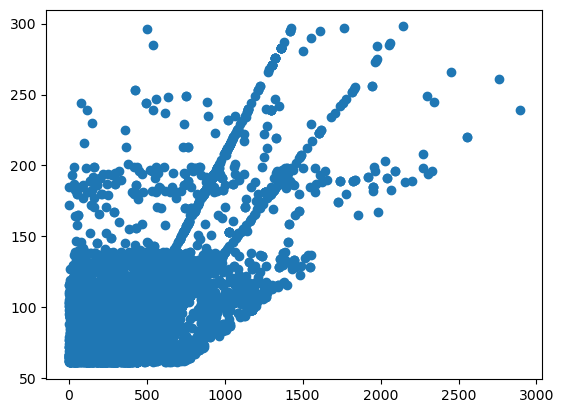

In [50]:
plt.scatter(data4['total_claim_amount'], data4['monthly_premium_auto'])
plt.show()

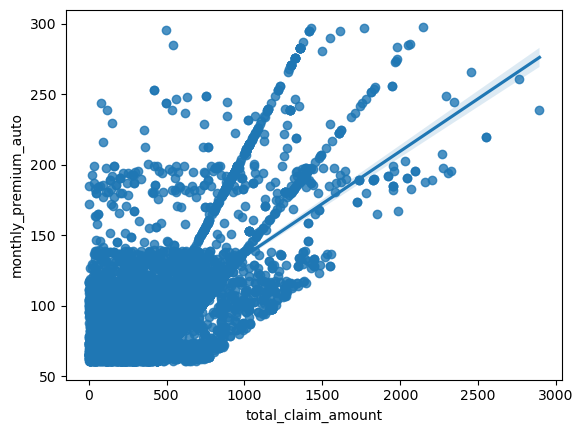

In [51]:
sns.regplot(x = data4['total_claim_amount'],y = data4['monthly_premium_auto'])
plt.show()

<Axes: xlabel='gender', ylabel='total_claim_amount'>

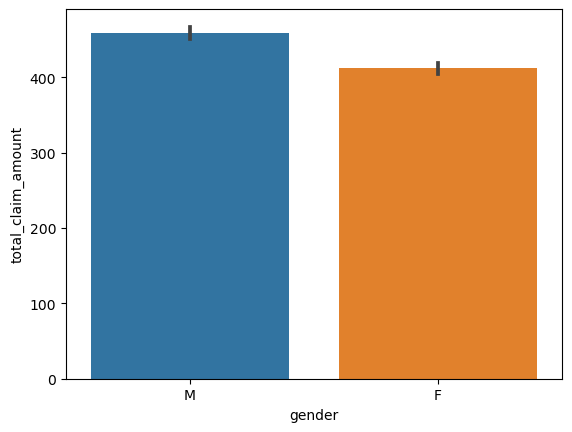

In [52]:
sns.barplot(x=data4['gender'], y=data4['total_claim_amount'])
            

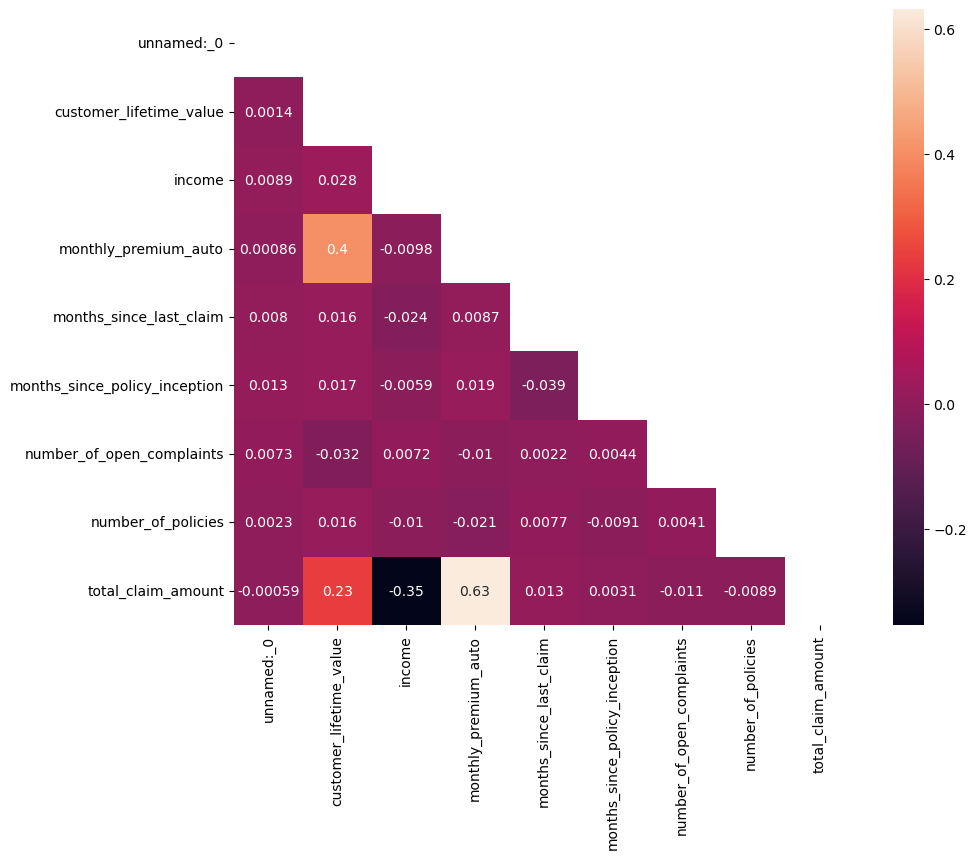

In [53]:
# Correlation amongst features - Multicolinearity

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


In [54]:
# Encoding Categorical Variables

data5=data4.copy()

data5= pd.get_dummies(data5, drop_first=True)
data5


,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,total_claim_amount,customer_AA11235,customer_AA16582,customer_AA30683,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_others,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_others,vehicle_type_others
0,0,4809.216960,48029,61,52,9,292.800000,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,1,2228.525238,0,64,26,1,744.924331,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,2,14947.917300,22139,100,31,2,480.000000,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,3,22332.439460,49078,97,3,2,484.013411,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,4,9025.067525,23675,117,31,7,707.925645,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,40,7,1214.400000,False,False,False,...,True,False,False,False,False,False,True,False,False,False
10906,10906,5259.444853,61146,65,68,6,273.018929,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10907,10907,23893.304100,39837,201,63,2,381.306996,False,False,False,...,False,True,False,False,False,False,True,False,False,True
10908,10908,11971.977650,64195,158,27,6,618.288849,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [55]:
# Splitting into train set and test set

x = data5.drop(['unnamed:_0','total_claim_amount'], axis=1)
y = data5['total_claim_amount']



In [56]:
# Train-test split:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_others,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_others,vehicle_type_others
7722,2903.939763,67763,73,69,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6888,7317.014254,24083,63,2,2,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
675,5568.889245,53295,70,97,8,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4098,3451.102440,0,104,65,1,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
4518,2402.172069,43246,62,89,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3810.238281,0,108,57,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5191,3815.851163,38651,98,83,1,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
5390,7850.590399,0,69,78,2,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
860,4974.235309,0,70,74,3,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [57]:
# Normalization

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [58]:
# Apply model

lm = LinearRegression()

lm.fit(x_train_scaled, y_train)

predictions = lm.predict(x_test_scaled)

In [59]:
# Model Validation

rmse = mean_squared_error(y_test, predictions, squared = False)
mae = mean_absolute_error(y_test, predictions)

print("R2_sqore:",round(r2_score(y_test, predictions), 2))
print("RMSE :", rmse)
print("MAE:", mae)

R2_sqore: 0.0
RMSE : 287.4365238810667
MAE: 181.3661745335073


<Axes: xlabel='total_claim_amount'>

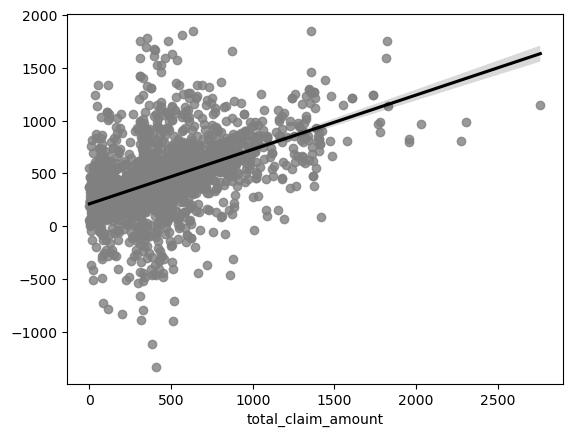

In [60]:
# Improving the model


sns.regplot(x=y_test, y=predictions, line_kws={"color": "black"}, scatter_kws={"color": "grey"})



In [61]:
# Log scaling

y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)


y_train_scaled

7722    4.092041
6888    5.830279
675     5.523155
4098    6.213007
4518    3.959578
          ...   
5734    6.656212
5191    6.153583
5390    5.802722
860     5.817111
7270    6.313548
Name: total_claim_amount, Length: 7637, dtype: float64

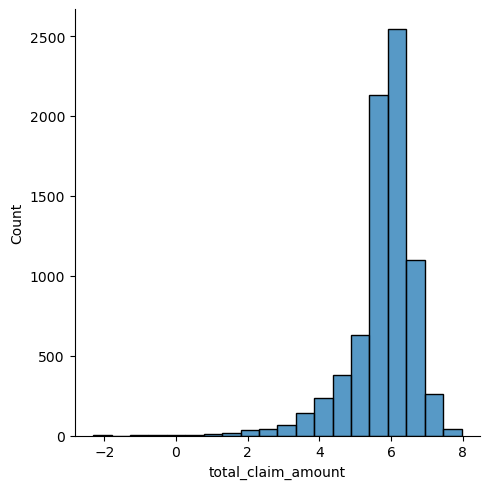

In [62]:
sns.displot(y_train_scaled, bins= 20)

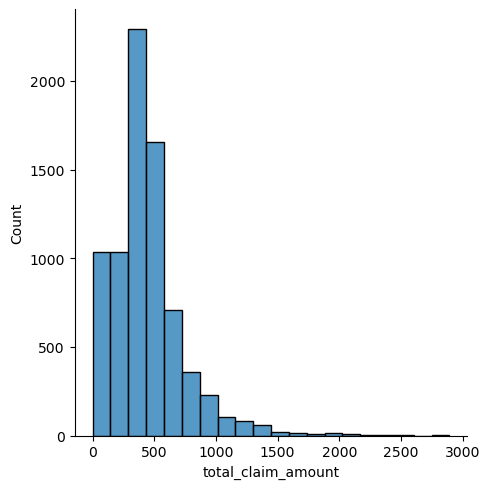

In [63]:
sns.displot(y_train, bins=20)

In [64]:
lm = LinearRegression()
lm.fit(x_train_scaled, y_train_scaled)

predictions = lm.predict(x_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2))

R2_score: -0.05


<Axes: xlabel='total_claim_amount'>

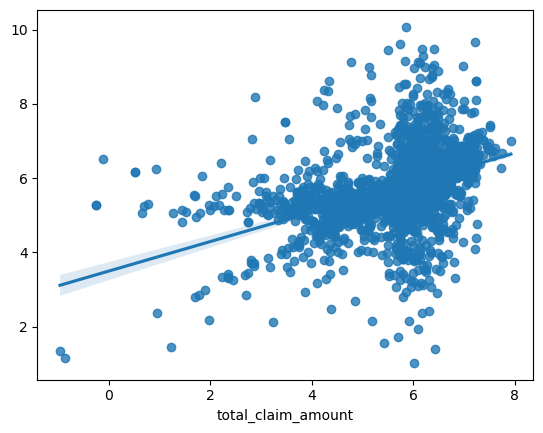

In [65]:
sns.regplot(x=y_test_scaled, y=predictions)

In [66]:
# check the errors

result_df = x_test
result_df["total_claim_amount"] = y_test
result_df["scaled_total_claim_amount"] = y_test_scaled
result_df["error"] = abs(y_test_scaled - predictions)
result_df.sort_values("error", ascending=False)


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,...,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_others,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_others,vehicle_type_others,total_claim_amount,scaled_total_claim_amount,error
4532,2494.869528,45855,62,26,1,False,False,False,False,False,...,False,False,False,False,False,False,False,0.887629,-0.119201,6.634890
5924,22563.618380,23046,65,7,2,False,False,False,False,False,...,False,True,False,False,False,False,False,1.687291,0.523124,5.633924
10883,22563.618380,23046,65,7,2,False,False,False,False,False,...,False,False,True,False,False,True,False,1.687291,0.523124,5.633924
5928,3969.433177,49544,101,29,1,False,False,False,False,False,...,False,False,False,True,False,False,False,0.769185,-0.262424,5.541487
10529,3969.433177,49544,101,29,1,False,False,False,False,False,...,False,False,False,True,False,False,False,0.769185,-0.262424,5.541487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,2674.730716,56342,69,89,1,False,False,False,False,False,...,False,False,False,False,True,False,True,331.200000,5.802722,0.000318
10832,2822.591481,25531,74,52,1,False,False,False,False,False,...,False,True,False,False,True,False,True,355.200000,5.872681,0.000305
567,4923.950434,31093,63,78,3,False,False,False,False,False,...,False,False,False,True,False,False,False,302.400000,5.711751,0.000246
708,4447.423455,13128,118,21,1,False,False,False,False,False,...,False,False,False,True,False,False,True,771.878514,6.648827,0.000051


<Axes: xlabel='total_claim_amount', ylabel='error'>

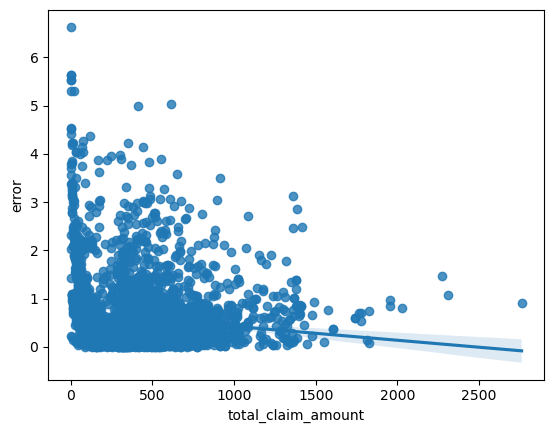

In [67]:
sns.regplot(result_df, x='total_claim_amount', y='error')

In [70]:

df_no_outliers = data5[data5["total_claim_amount"] < 961.3762098750001]
df_no_outliers

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,total_claim_amount,customer_AA11235,customer_AA16582,customer_AA30683,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_others,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_others,vehicle_type_others
0,0,4809.216960,48029,61,52,9,292.800000,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,1,2228.525238,0,64,26,1,744.924331,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,2,14947.917300,22139,100,31,2,480.000000,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,3,22332.439460,49078,97,3,2,484.013411,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,4,9025.067525,23675,117,31,7,707.925645,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,10903,2771.663013,59855,74,82,1,355.200000,False,False,False,...,False,False,False,False,True,False,True,False,False,False
10904,10904,19228.463620,0,187,32,2,897.600000,False,False,False,...,False,True,False,False,False,False,True,False,False,False
10906,10906,5259.444853,61146,65,68,6,273.018929,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10907,10907,23893.304100,39837,201,63,2,381.306996,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [ ]:

#numerical1= numerical.columns.drop(['months_since_last_claim'], ['number_of_open_complaints'])


#numerical1

In [72]:
missing_columns = [col for col in numerical if col not in df_no_outliers.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
    

numerical_columns_present = [col for col in numerical if col in df_no_outliers.columns]
df_no_outliers[numerical_columns_present] = df_no_outliers[numerical_columns_present].applymap(lambda x: np.log(x) if x > 0 else 0)

df_no_outliers

Missing columns: ['months_since_last_claim', 'number_of_open_complaints']


,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,number_of_policies,total_claim_amount,customer_AA11235,customer_AA16582,customer_AA30683,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_class_others,vehicle_size_Medsize,vehicle_size_Small,vehicle_size_others,vehicle_type_others
0,0.000000,8.478290,10.779560,4.110874,3.951244,2.197225,5.679490,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,0.000000,7.709095,0.000000,4.158883,3.258097,0.000000,6.613283,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,0.693147,9.612327,10.005096,4.605170,3.433987,0.693147,6.173786,False,False,False,...,False,False,True,False,False,False,True,False,False,False
3,1.098612,10.013796,10.801166,4.574711,1.098612,0.693147,6.182113,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,1.386294,9.107761,10.072175,4.762174,3.433987,1.945910,6.562339,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,9.296793,7.927203,10.999680,4.304065,4.406719,0.000000,5.872681,False,False,False,...,False,False,False,False,True,False,True,False,False,False
10904,9.296885,9.864147,0.000000,5.231109,3.465736,0.693147,6.799725,False,False,False,...,False,True,False,False,False,False,True,False,False,False
10906,9.297068,8.567781,11.021020,4.174387,4.219508,1.791759,5.609541,False,False,False,...,False,False,False,False,False,False,True,False,False,False
10907,9.297160,10.081354,10.592551,5.303305,4.143135,0.693147,5.943605,False,False,False,...,False,True,False,False,False,False,True,False,False,True


In [74]:
X = df_no_outliers.drop([ "total_claim_amount"], axis=1) 
y = df_no_outliers["total_claim_amount"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lm = LinearRegression()
lm.fit(X_train, y_train)


predictions = lm.predict(X_test)
print("R2_score:", round(r2_score(y_test, predictions), 2))




R2_score: 0.81


### Business Case Conclusions

The dataset contains information about customers, including demographics, policy details, and interactions with the company.
Features include customer ID, gender, education, employment status, vehicle type, total claim amount, and more.

Our goal is to predict customer churn (i.e., when a customer stops using our services) based on historical data.
By identifying potential churners early, we can take proactive measures to retain them.


Our marketing team uses machine learning to predict which customers are likely to churn.
We analyze historical data (customer demographics, interactions, claims, etc.) to build a predictive model.
The model assigns a churn probability score to each customer.